In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline  

def linear_fit (self,intercept=-1):
    import pandas as pd
    x=[]
    n=0
    while n<len(self) :
        x.extend([self.iloc[n,0]])
        n=n+1
    y=[]
    n=0
    while n<len(self) :
        y.extend([self.iloc[n,1]])
        n=n+1
    m=int
    if intercept==-1:
        x_dif=[]
        n=0
        while n<len(x):
            x_dif.extend([(x[n]-np.mean(x))])
            n=n+1
        while n<len(self) :
            y.extend([self.iloc[n,1]])
            n=n+1
        y_dif=[]
        n=0
        while n<len(y):
            y_dif.extend([(y[n]-np.mean(y))])
            n=n+1

        x_dif=np.array(x_dif)
        y_dif=np.array(y_dif)
        m=sum(y_dif*x_dif)/sum(x_dif*x_dif)
        c = np.mean(y)-m*np.mean(x)
        v = [m,c]
    else:
        n=0
        xy=[]
        while n<len(x):
            xy.extend([x[n]*(y[n]-intercept)])
            n=n+1
        xx=[]
        n=0
        while n<len(x):
            xx.extend([x[n]*x[n]])
            n=n+1
        m=sum(xy)/sum(xx)
        c = intercept
        v = [m,c]
    R=int
    n=0
    res_y=[]
    squ_y=[]
    while n<len(y):
        res_y.extend([(y[n]-(m*x[n]+c))**2])
        n=n+1
    n=0
    while n<len(y):
        squ_y.extend([(y[n]-np.mean(y))**2])
        n=n+1
    R=1-sum(res_y)/sum(squ_y)
    v=[m,c,R]
    return v
        
        
data = {'NitrateConc(mg/L)': [5, 10, 15, 30, 75, 150, 250, 500], 'Abs': [0.074386, 0.084085333, 0.098524667, 0.173196667, 0.398297667, 0.932313, 1.618164, 3.265740333]}
df_data=pd.DataFrame(data)
v=linear_fit(df_data)
print(v[2])
x=[]
n=0
while n<len(df_data) :
    x.extend([df_data.iloc[n,0]])
    n=n+1
y=[]
n=0
while n<len(df_data) :
    y.extend([df_data.iloc[n,1]])
    n=n+1
n=0
y_init=[]
max=np.max(y)
print(max)
while n<len(y):
    y_init.extend([1/(y[n]-(max+0.1))])
    n=n+1
dfl=[x,y_init]
df = pd.DataFrame (dfl).transpose()
df.columns = ['x', 'y_init']
R=v[2]
type(int(R))

0.9986713166140342
3.265740333


int

Start
Finish


[-3.9999999998344347, 4.999999999899571, 6.682050586203838e-10]

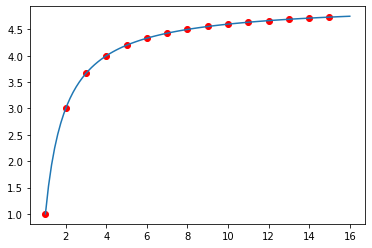

In [168]:
print("Start")
def inverse_fit (self,dp=0.1):
    import pandas as pd
    x=[]
    n=0
    while n<len(self) :
        x.extend([self.iloc[n,0]])
        n=n+1
    # make x array
    y=[]
    n=0
    while n<len(self) :
        y.extend([self.iloc[n,1]])
        n=n+1
    # make y array
    n=0
    inv_x=[]
    n=0
    while n<len(self) :
        inv_x.extend([1/x[n]])
        n=n+1
    # make 1/x array
    dfl=[inv_x,y]
    df = pd.DataFrame (dfl).transpose()
    df.columns = ['inv_x', 'y']
    v=linear_fit(df)
    k=v[0]
    c=v[1]
    # Use linear fit of 1/x to guess k and c
    n=0
    y_new=[]
    while n<len(y):
        y_new.extend([((k/x[n])+c)])
        n=n+1
    res_y=[]
    n=0
    while n<len(y):
        res_y.extend([(y[n]-y_new[n])**2])
        n=n+1
    SumRes=(np.sum(res_y))**0.5
    # Check residues of k and c
    r=[k,c]
    r.append(SumRes)
    n=0
    r[2]=SumRes
    r[0]=k
    ax=plt.axes()
    ax.scatter(x,y,color='red')
    n=0
    plot_y=[]
    plot_x=np.linspace(np.min(x),int(np.max(x)+np.min(x)),100)
    while n<len(plot_x):
        plot_y.extend([((k/plot_x[n])+c)])
        n=n+1
    ax.plot(plot_x,plot_y)
    return r

data = {'NitrateConc(mg/L)': [5, 10, 15, 30, 75, 150, 250, 500], 'Abs': [0.074386, 0.084085333, 0.098524667, 0.173196667, 0.398297667, 0.932313, 1.618164, 3.265740333]}
df_data=pd.DataFrame(data)
data2 = {'x': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],'y':[1,3,(11/3),4,4.2,(13/3),((-4/7)+5),4.5,(41/9),4.6,4.636363636,4.666666667,4.692307692,4.714285714,4.733333333]}
df_data2=pd.DataFrame(data2)
v=inverse_fit(df_data2,0.1)
print("Finish")
v

In [217]:
data2 = {'x': [1,2,3,4,5,6,7,8,9,10],'y':[1,3,(11/3),4,4.2,(13/3),((-4/7)+5),4.5,(41/9),4.6]}
df_data2=pd.DataFrame(data2)
dp=1/10
x=[]
n=0
while n<len(df_data2) :
    x.extend([df_data2.iloc[n,0]])
    n=n+1
y=[]
n=0
while n<len(df_data2) :
    y.extend([df_data2.iloc[n,1]])
    n=n+1
n=0
y_init=[]
max=np.max(y)
while n<len(y):
    y_init.extend([1/(y[n]-(max+dp))])
    n=n+1
dfl=[x,y_init]
df = pd.DataFrame (dfl).transpose()
df.columns = ['x', 'y_init']
v=linear_fit(df,0)
R=float(v[2])
count=0
while float(R)<0.99 and count<100:
    max=max+dp
    n=0
    while n<len(y_init):
        y_init[n]=(1/(y[n]-max))
        n=n+1
    dfl=[x,y_init]
    df = pd.DataFrame (dfl).transpose()
    df.columns = ['x', 'y_init']
    v=linear_fit(df)
    R=float(v[2])
    count=count+1
    r=[x,y_init,max]
if count==100:
    print("Data does not fit y = k/x + c")
    v=['NA','NA','NA']
y_init
max
R


0.9945720571198094

[-1.1435350908606918, 0.40965693168677897, 0.046856866172492566]

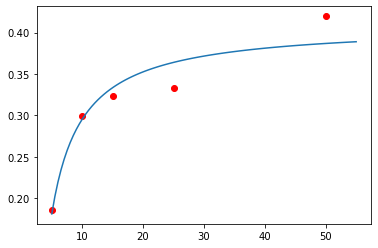

In [169]:
data3 = {'Cellulose Mass (mg)':[5,10,15,25,50], 'Abs (a.u.)': [0.185137194,0.299465037,0.323579879,0.332546766,0.419647477]}
df_data3=pd.DataFrame(data3)
inverse_fit(df_data3)
